### Ecce Homo application to improve Machine Learning workflow
In the following notebook we will explore 3 datasets from Kaggle competitions, to see how well Ecce Homo performs on automatically create data products and contrast them with the information of participants in mentioned competitions

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, roc_curve
import eccehomo

### Exploratory Data Analysis
Ecce Homo performs basic exploratory data analysis automatically and plot the data to a html file. What is basic exploratory data analysis:
* Descriptive statistics. Count, mean, median, first and third quartile, min and max.
* Unique values for categorical data.
* Agregate data on categorical data 
* Boxplots
* Histograms
* Empty values
* Correlations and heatmaps
* pair scatter plots
* bar plots on categorical data

The decision of printing exploratory data analysis results in other place is to keep clean your notebook.
For more help use the help() function

In [154]:
df = pd.read_csv('data/titanic/titanic.csv')

### Data
We still have to understand what information each feature is providing us. Even though there is a brief explanation of the data in the html created.
* Survival: 0 is No 1 is Yes.
* Pclass: Is the ticket class, 1st, 2nd, 3rd.
* Sex: Gender of passenger
* Age: Age in years.
* SibSp: Siblings/Spouses Aboard, number of sibling or spouses abroad in the titanic.
* Parch:Parents/Children Aboard, parents (or children) on the ship
* Ticket: Ticket number
* Fare: Passenger Fare (price of ticket)
* Cabin: Cabin number
* Embrked: Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
eda = eccehomo.EDA(df, 'Survived', output_path = "data/titanic")
eda.describe(to_print = True)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [39]:
eda.unique_values(unique_size = 2)
#There are two categorical variables. One is name and not important for our exploration
eda.groupby(aggregators =['Survived', 'Sex', 'Embarked', 'Cabin'])
eda.boxplot()
eda.histograms()
eda.empty_values(to_print = True)
eda.correlations()
eda.barplot()
#There is a max column parameter to avoid printing all columns and select random features to plot
eda.scatter()
eda.make_html(name = 'summary_titanic_eda')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/home/mauriciomani/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mauriciomani/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

<Figure size 1260x1260 with 0 Axes>

# HTML file
This cell brings the images saved from the cell above.<br>
**Please** if open the html file in Jupyter lab, images would not be displayed. Try it on your browser, test on Google Chrome worked.
<img src="data/titanic/boxplot2.png" alt="Not found"><br><img src="data/titanic/boxplot3.png" alt="Not found"><br><img src="data/titanic/boxplot4.png" alt="Not found"><br><img src="data/titanic/boxplot5.png" alt="Not found"><br><img src="data/titanic/boxplot6.png" alt="Not found"><br><img src="data/titanic/histograms1.png" alt="Not found"><br><img src="data/titanic/histograms2.png" alt="Not found"><br><img src="data/titanic/correlation.png" alt="Not found"><br><img src="data/titanic/bar2.png" alt="Not found"><br><img src="data/titanic/bar3.png" alt="Not found"><br><img src="data/titanic/bar4.png" alt="Not found"><br><img src="data/titanic/bar5.png" alt="Not found"><br><img src="data/titanic/bar6.png" alt="Not found"><br><img src="data/titanic/pairplot.png" alt="Not found">

### Conclusions based on EDA
The dataset is unbalanced, meaning that there are more people that did not survive. People older than 30 years deacrese the chance of surviving, females survived more than males and having a higher fare meant more chances of suriving.
There are no clear linear relationsips between variables. There were more male than female, and more people in third class. Age, cabin and embarked have null values.
Due to the nature of the distributions we will not perform any variable transformations.
**Passenger id and name will not be included to perform any prediction.**

Before any preprocessing to the data, it is neccesary to split the data into train and test. We are not going to use validantion data due to the fact that we will perform cross validation. The split strategy will be 80-20.

In order to extract the title of te people aboard we perform the former trasnformation. Dictonary was extracted from: https://www.ahmedbesbes.com/blog/kaggle-titanic-competition (implementation different).
As we have seen above on the histogram younger people survived more, so we are going to use a boolean indicator to let the algorithm know when young. The family realted variables were joined, to avoid noise.

In [155]:
def find_title(string):
    start = string.find(",")
    end = string.find(".")
    return(string[start +2:end].strip())
df['title'] = df.Name.apply(find_title)
df.title.replace({
    "Capt": "Crew",
    "Col": "Crew",
    "Major": "Crew",
    "Jonkheer": "Royal",
    "Don": "Royal",
    "Sir" : "Royal",
    "Dr": "Crew",
    "Rev": "Crew",
    "the Countess":"Royal",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royal"}, inplace = True)

In [156]:
X = df.drop(['Survived', 'Name'], axis = 1)
X['Cabin'] = X.Cabin.str[0]
X['young'] = (X.Age<=15).astype(int)
X["family"] = X.SibSp + X.Parch
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =12) 

### Imputation
For this task we will use the class DataImputation and method user_defined that will perform wanted imputation for every variable. As observed on the EDA, "Embarked", "Cabin" and "Age" have missing values, for Embarked, having only two variables we will impute with the most frequest value, for cabin we will add the missing indicator "other" and for Age we will use de KNN Imputer approach.

In [157]:
imputation = eccehomo.DataImputation(X_train, X_test)
X_train = imputation.user_defined(defined_methods = {"Embarked":"mode", "Cabin":"indicator", "Age":"knn"}, indicator = 'other')
X_test = imputation.test_imputation(imputation.imputed_values, use_value = True)
imputation.imputed_values

{'Embarked': ['mode', 'S'],
 'Cabin': ['indicator', 'other'],
 'Age': ['knn',
  KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
             missing_values=nan, n_neighbors=5, weights='uniform')]}

### Variable encoding
We will encode and "Sex", "Pclass", "Cabin" and "title". Pclass has being one hot encoded since there is no clear class 1st and 2nd have strictly 1 unit relation, same with third. Cabin as done above only include the letter and title, might give us the importance of the person. We will not use "Embarked" since it will not give us valuable information on whether they survived or not.

In [158]:
id_train = X_train.PassengerId
id_test = X_test.PassengerId
X_train = X_train[['Sex', 'Pclass', 'Age', 'family','Fare', "Cabin", "young", 'title']]
X_test = X_test[['Sex', 'Pclass', 'Age', 'family','Fare', "Cabin", "young", 'title']]
df = pd.get_dummies(X_train.append(X_test), columns = ["Pclass", "Sex", "Cabin", 'title'],  drop_first = True)
X_test = df.iloc[-X_test.shape[0]:,:]
X_train = df.iloc[:-X_test.shape[0],:]

### Unbalance dataset
For the minority class 1 (Survived) it was expected to create synthetic observations using SMOTE, that stands for Synthetic Minority oversampling technique. In other words, we wanted to create artificial observations for the minority class aiming to balance 50-50 target class. The cell bellow shows the amount of observations for every target class,plus the implementation of SMOTE 

In [159]:
smote = SMOTE(random_state=12)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

1    449
0    449
Name: Survived, dtype: int64

### Scaling
As explained on the EDA conclusions, due to the nature of the distributions, uing minmax for scaling is better than standarized, since we do not have strictly normal distributions.

In [160]:
minmax = MinMaxScaler().fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

### Automatic Bayesian Optimization
Ecce Homo application performs automatic Bayesian Optimization on desaired algorithm, implemented using: https://github.com/fmfn/BayesianOptimization
For a better understanfing on this technique please refer to pdf. Crossvalidation is being used, we will use f1 score, due to the fact tht we might not want to be very precise nor lax.

In [172]:
model = eccehomo.Modeling(X_train, y_train, algo = "RandomForest", iter = 50, scoring='f1').optimize()

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.844    |  47.94    |  19.02    |  7.32     |  14.28    |  13.5     |
|  2        |  0.8466   |  275.8    |  22.72    |  1.802    |  24.01    |  42.93    |
|  3        |  0.8138   |  86.58    |  15.94    |  23.66    |  21.61    |  10.54    |
|  4        |  0.8305   |  157.3    |  14.7     |  12.65    |  19.67    |  48.57    |
|  5        |  0.8114   |  229.8    |  2.479    |  4.245    |  4.674    |  84.38    |
|  6        |  0.8198   |  2.0      |  25.0     |  1.0      |  25.0     |  250.0    |
|  7        |  0.8502   |  269.8    |  25.0     |  1.0      |  25.0     |  238.9    |
|  8        |  0.8408   |  46.25    |  16.11    |  5.647    |  14.8     |  10.04    |
|  9        |  0.8506   |  174.9    |  24.33    |  1.083    |  3.778    |  22.35    |
|  10       |  0.8482   |  121.2    |  24.96    |  2.6

### Metrics and model information
The former process was applied to Logistic Regression, Support Vector Machine and Gradient Boosting Tree. Obtaining best results on Random Forest. Our score to otpimize when performing cross validation and bayesian optimization was F1. Which is a metric that takes into account Precision and Recall. We do not want to exclude those that could survive (precision) neither be very inclusive (recall). We want a good estimator that balance between the latter metrics. 

In [2]:
def compute_metrics(estimator, X_train, y_train, X_test, y_test):
    y_pred = estimator.predict(X_train)
    print("Train metrics:")
    print("Accuracy: ", accuracy_score(y_train, y_pred))
    print("Precision: ", precision_score(y_train, y_pred))
    print("Recall: ", recall_score(y_train, y_pred))
    print("F1 score: ", f1_score(y_train, y_pred))
    print("ROC AUC", roc_auc_score(y_train, y_pred))
    print("Cohen Kappa", cohen_kappa_score(y_train, y_pred))
    cm = confusion_matrix(y_train, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    print("False Positive Rate: ", (FP / (FP+TN)))
    print("False Negative Rate: ", (FN / (TP+FN)))
    print("True Negative Rate (Specificity): ", (TN / (TN+FP)))
    y_pred = estimator.predict(X_test)
    print("\nTest metrics:")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    print("ROC AUC", roc_auc_score(y_test, y_pred))
    print("Cohen Kappa", cohen_kappa_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    print("False Positive Rate: ", (FP / (FP+TN)))
    print("False Negative Rate: ", (FN / (TP+FN)))
    print("True Negative Rate (Specificity): ", (TN / (TN+FP)))

In [230]:
compute_metrics(model, X_train, y_train, X_test, y_test)

Train metrics:
Accuracy:  0.8819599109131403
Precision:  0.9193154034229829
Recall:  0.8374164810690423
F1 score:  0.8764568764568764
ROC AUC 0.8819599109131403
Cohen Kappa 0.7639198218262806
False Positive Rate:  0.07349665924276169
False Negative Rate:  0.16258351893095768
True Negative Rate (Specificity):  0.9265033407572383

Test metrics:
Accuracy:  0.8268156424581006
Precision:  0.8243243243243243
Recall:  0.7721518987341772
F1 score:  0.7973856209150328
ROC AUC 0.8210759493670886
Cohen Kappa 0.6464479133482001
False Positive Rate:  0.13
False Negative Rate:  0.22784810126582278
True Negative Rate (Specificity):  0.87


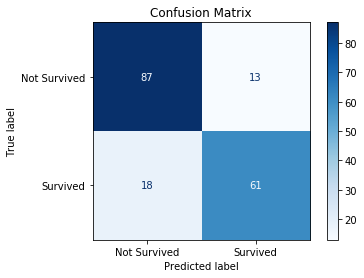

In [231]:
plot_confusion_matrix(model, X_test, y_test, display_labels = ['Not Survived', 'Survived'], cmap=plt.cm.Blues)#, normalize = 'true')
plt.title("Confusion Matrix")
plt.show()

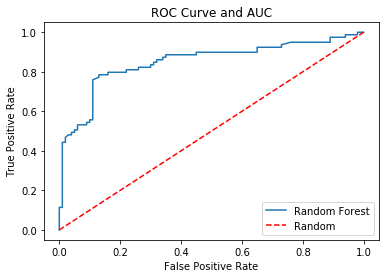

In [226]:
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1],'r--', label= "Random")
plt.title("ROC Curve and AUC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Titanic model conclusion
This is a binary problem, with a lower recall, compared to precision, this means we are pretty sure of those observations marked as survived really survived, but not very good at bringing a lot of possible survives. In other words we are highly penalizing predicting survived when not really survived. 
Through the metric on accuracy in both train and test we can be confidently that our model is not highly overfitting the data. However our values on the cohen kappa metrics that measure how well our model is compared to random decisiones, in train is quite high but in test is not that high. <br>
13% of the time we will false alarm regarding you survived when you did not. And we have an area under the ROC curve of 0.82. As we can observe in the ROC curve our random forest line lies above the random line and more closer to the top left bottom. Below this histogram of the titanic leaderboard, where by automatic imputation and hyperparameter tunning we found ourserlves almost 5% above the median.

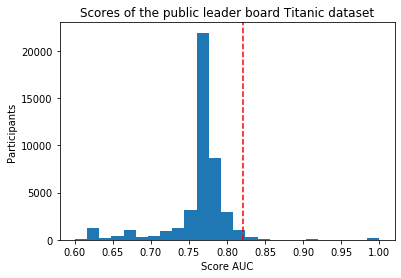

Median of scores:  0.7703300000000001


In [254]:
score = pd.read_csv('data/titanic/leaderboard.csv').Score
plt.hist(score[score >= 0.6], bins = 25)
plt.axvline(0.821, color ='r', linestyle = '--')
plt.title("Scores of the public leader board Titanic dataset")
plt.xlabel("Score AUC")
plt.ylabel("Participants")
plt.show()
print("Median of scores: ", score.median())

# Next: churn and fraud will help exemplify Ecce Homo as a tool to build benchmark models and compete aginst them. Will show the importance of feature engineering (performed above) and the easy to implement Machine learning benchmarks with Ecce Homo

# Churn dataset
In this section we will move forward to the core idea of Ecce Homo application that is automate the machine learning workflow to work as a benchmark so that you can focus on feature engineering tasks, that as shown above are crucial to achieve awsome results (as shown above), however, ecce homo can help develop part of the tasks. For more information visit: https://www.kaggle.com/c/ic20182/overview

In [15]:
df = pd.read_csv('data/churn/churn_train.txt')
df["TotalCharges"] = pd.to_numeric(df.TotalCharges.str.replace(" ", ""))

In [373]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [349]:
eda = eccehomo.EDA(df, 'Churn', output_path = "data/churn")
eda.describe(to_print = True)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5674.000000  5674.000000     5674.000000   5664.000000
mean        0.163024    32.532252       64.705684   2298.882283
std         0.369420    24.669244       30.276730   2284.787328
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       34.725000    399.562500
50%         0.000000    29.000000       70.350000   1391.400000
75%         0.000000    56.000000       89.950000   3828.362500
max         1.000000    72.000000      118.750000   8684.800000


In [295]:
eda.groupby(aggregators = ['gender' ,"Partner" ,"Dependents", "PhoneService", "MultipleLines", 
                           "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                           "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
                           "PaymentMethod", "Churn"])
eda.boxplot(name_string = ['gender', "MultipleLines", "InternetService"])
eda.histograms()
eda.empty_values(to_print = True)
eda.correlations()
eda.barplot()
#There is a max column parameter to avoid printing all columns and select random features to plot
eda.scatter()
eda.make_html(name = 'summary_churn_eda')

/home/mauriciomani/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64


/home/mauriciomani/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mauriciomani/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

### Unique values
As seen above, our dataset have 10 missing values from 5674 observations as shown in the created summary_churn_eda.html file. Due to the amount of missing data we can just get rid of it, instead of imputing it.

In [16]:
df.dropna(inplace = True)

### Train test split and limits.
Ecce homo does not perform any atutomatic enconding, so we hav to call One Hot encoder from sklearn, before train test split to capture all the new labels. Obtining 30 rows in total.
After that we are going to delete "customerID" from our data and separate our target variable. We are going to make an 80-20 train test split strategy.

In [17]:
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
        'MonthlyCharges', 'TotalCharges']]
X = pd.get_dummies(X,  drop_first = True)
y = (df.Churn == 'Yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =12) 

### Unbalanced dataset
We have to balance the dataset because the proportion between those that churn and those that did not is quite high. We are goin to use SMOTEENN to perform this. Wich is a tequnique that uses SMOTE for oversampling and Edited Nearest neighbors together with Tomek links for undersampling, makinf the decision boundaries more clean.

In [18]:
y.value_counts()

0    4174
1    1490
Name: Churn, dtype: int64

In [22]:
smoteenn = SMOTEENN(random_state=12)
X_train, y_train = smoteenn.fit_resample(X_train, y_train)
y_train.value_counts()

1    1952
0    1701
Name: Churn, dtype: int64

### Scaling
Due to the nature of the distribution of the numerical variables, minmax scaling is going to be used.

In [23]:
minmax = MinMaxScaler().fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

### Automatic Hyperparameter Tunning
As seen above, ecce homo can perform auotomatic hyperparameter tunning through bayesian optimization. Because of the nature of the dataset, tree based models, will perform better, because splitting will be easier.

In [24]:
model = eccehomo.Modeling(X_train, y_train, algo = "GradientBoostingTree", iter = 50, scoring='recall').optimize()

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.9508   |  0.03168  |  222.5    |  7.32     |  14.28    |  14.23    |
|  2        |  0.957    |  0.1838   |  270.4    |  1.802    |  24.01    |  49.79    |
|  3        |  0.9462   |  0.05748  |  182.6    |  23.66    |  21.61    |  10.66    |
|  4        |  0.958    |  0.1047   |  166.5    |  12.65    |  19.67    |  56.61    |
|  5        |  0.9652   |  0.1531   |  8.201    |  4.245    |  4.674    |  99.87    |
|  6        |  0.9585   |  0.1306   |  256.9    |  15.23    |  3.062    |  299.3    |
|  7        |  0.9652   |  0.1196   |  3.168    |  1.166    |  20.21    |  291.7    |
|  8        |  0.9483   |  0.08373  |  5.113    |  2.148    |  24.73    |  16.99    |
|  9        |  0.939    |  0.03666  |  127.9    |  1.662    |  2.605    |  185.8    |
|  10       |  0.9616   |  0.1914   |  297.9    |  23.

In [25]:
compute_metrics(model, X_train, y_train, X_test, y_test)

Train metrics:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
ROC AUC 1.0
Cohen Kappa 1.0
False Positive Rate:  0.0
False Negative Rate:  0.0
True Negative Rate (Specificity):  1.0

Test metrics:
Accuracy:  0.7493380406001765
Precision:  0.5106888361045131
Recall:  0.7337883959044369
F1 score:  0.6022408963585434
ROC AUC 0.7442751503331708
Cohen Kappa 0.4277126433510715
False Positive Rate:  0.24523809523809523
False Negative Rate:  0.26621160409556316
True Negative Rate (Specificity):  0.7547619047619047


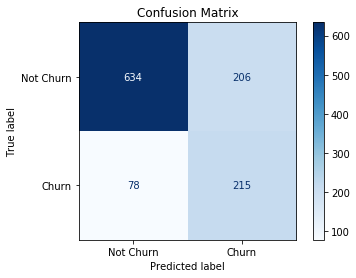

In [26]:
plot_confusion_matrix(model, X_test, y_test, display_labels = ['Not Churn', 'Churn'], cmap=plt.cm.Blues, values_format = 'd')#, normalize = 'true')
plt.title("Confusion Matrix")
plt.show()

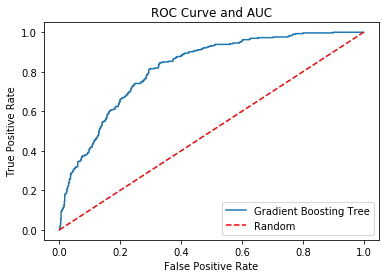

In [27]:
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="Gradient Boosting Tree")
plt.plot([0, 1], [0, 1],'r--', label= "Random")
plt.title("ROC Curve and AUC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Churn model conclusion
A gradient boosting tree model was optimized using bayesian methods to imrpove recall measure. In other words, we suppose our marketing team has told us, we have unlimited human resources to go through all the churn cases and create actions for each one (or the team is working in a personalized tool once we know customers will churn). Therefore, we want to build a model that brings all the possible churn, in other words, penalized less when failing saying churn and was not really a churn. Obtaining a 0.82 recall on test. Ecce homo might also help us identify when particular algorithm overfit with particular approaches. We have a high amount of false positives (disadvantage of recall), however, it is aligned with our "business" strategy. Are Kohen Cappa is very bad and false positive rate is as expected. Our are under the curve on test is way above than random and near the median to the leaderboard. We can also increase our metrics through decresaing our decision threshold, having more false positives, but knowing we are going as deep and extensive as possible.<br>
Ecce Homo does not aim to perform feature selection and only has Logistic regression, gradient boosting tree, random forest, and support vector machine with poly kernel. 

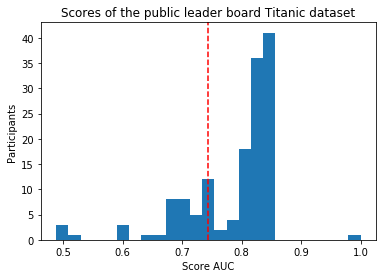

Median of scores:  0.81921


In [29]:
score = pd.read_csv('data/churn/leaderboard.csv').Score
plt.hist(score, bins = 25)
plt.axvline(0.744, color ='r', linestyle = '--')
plt.title("Scores of the public leader board Titanic dataset")
plt.xlabel("Score AUC")
plt.ylabel("Participants")
plt.show()
print("Median of scores: ", score.median())

### Fraud 
In this section, as above, we will perform automatic machine learning workflow tasks. 

In [3]:
df = pd.read_csv("data/fraud/train.csv")

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
eda = eccehomo.EDA(df, 'default payment next month', output_path = "data/fraud")
eda.describe(to_print = True)

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  20001.000000    20001.000000  20001.000000  20001.000000  20001.000000   
mean   10001.000000   163304.018799      1.614069      1.836908      1.556622   
std     5773.935703   128744.108770      0.486827      0.769545      0.522787   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     5001.000000    50000.000000      1.000000      1.000000      1.000000   
50%    10001.000000   130000.000000      2.000000      2.000000      2.000000   
75%    15001.000000   230000.000000      2.000000      2.000000      2.000000   
max    20001.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  20001.000000  20001.000000  20001.000000  20001.000000  20001.000000   
mean      35.333633      0.021399     -0.104245     -0.136343     -0.197390   
std        9.210588      1.121090

In [422]:
eda.groupby(aggregators =['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month'])
eda.histograms()
eda.empty_values(to_print = True)
eda.correlations()
#There is a max column parameter to avoid printing all columns and select random features to plot
eda.make_html(name = 'summary_fraud_eda')

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


<Figure size 432x288 with 0 Axes>

### NULL values and variable encoding
There are no null values in the dataset but accoriding to dataset information "SEX", "EDUCATION" and "MARRIAGE" should be one hot encoding. They are managed as categorical integers, but, as in the churn dataset the unit between categories might not explain the magnitude of changes 

In [6]:
X = pd.get_dummies(df.drop(["ID", "default payment next month"], axis = 1),  drop_first = True)
y = df["default payment next month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =12) 

In [7]:
X_train['y'] = y_train 
X = eccehomo.Outlier(X_train).isolation_forest(max_outliers = 1000)
y_train = X.y
X_train = X.drop('y', axis = 1)

/home/mauriciomani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
y_train.value_counts()

0    11213
1     3343
Name: y, dtype: int64

In [9]:
smote = SMOTE(random_state=12)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

1    11213
0    11213
Name: y, dtype: int64

In [10]:
minmax = MinMaxScaler().fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

In [11]:
model = eccehomo.Modeling(X_train, y_train, algo = "RandomForest", iter = 50, scoring='precision').optimize()

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.7614   |  47.94    |  19.02    |  7.32     |  14.28    |  13.5     |
|  2        |  0.7766   |  275.8    |  22.72    |  1.802    |  24.01    |  42.93    |
|  3        |  0.7469   |  86.58    |  15.94    |  23.66    |  21.61    |  10.54    |
|  4        |  0.7731   |  157.3    |  14.7     |  12.65    |  19.67    |  48.57    |
|  5        |  0.7598   |  229.8    |  2.479    |  4.245    |  4.674    |  84.38    |
|  6        |  0.7787   |  2.0      |  25.0     |  4.528    |  25.0     |  250.0    |
|  7        |  0.7749   |  266.6    |  24.1     |  3.11     |  23.94    |  249.6    |
|  8        |  0.7771   |  158.5    |  18.87    |  12.71    |  17.37    |  50.18    |
|  9        |  0.7763   |  141.8    |  24.93    |  4.107    |  24.87    |  149.6    |
|  10       |  0.7721   |  143.7    |  19.25    |  5.9

In [12]:
compute_metrics(model, X_train, y_train, X_test, y_test)

Train metrics:
Accuracy:  0.7432890395077143
Precision:  0.7896581015077511
Recall:  0.6632480156960671
F1 score:  0.7209539043187435
ROC AUC 0.7432890395077141
Cohen Kappa 0.4865780790154285
False Positive Rate:  0.17666993668063855
False Negative Rate:  0.33675198430393294
True Negative Rate (Specificity):  0.8233300633193614

Test metrics:
Accuracy:  0.7640589852536865
Precision:  0.49109653233364575
Recall:  0.5664864864864865
F1 score:  0.5261044176706827
ROC AUC 0.6949792640494852
Cohen Kappa 0.3700938052135059
False Positive Rate:  0.17652795838751625
False Negative Rate:  0.4335135135135135
True Negative Rate (Specificity):  0.8234720416124838


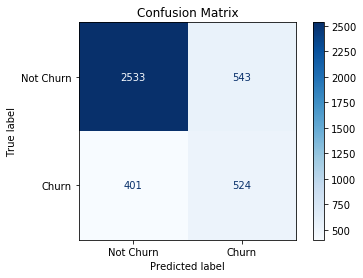

In [13]:
plot_confusion_matrix(model, X_test, y_test, display_labels = ['Not Churn', 'Churn'], cmap=plt.cm.Blues, values_format = 'd')#, normalize = 'true')
plt.title("Confusion Matrix")
plt.show()

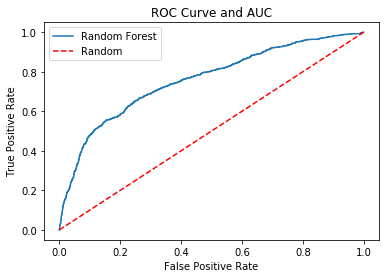

In [14]:
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1],'r--', label= "Random")
plt.title("ROC Curve and AUC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Conclusions on fraud dataset
We want or fraud detection to be very precise (since for example, we do not have enough personnel to perform all tasks), however confusion matrix results are not as expected, haing a lot of false positives and false negatives.